<a href="https://colab.research.google.com/github/EyaRIAHI-BE/Soft-Computing-Projects/blob/main/Copie_de_Fuzzy_Logic_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.2 MB/s eta 0:00:00


Importation des bibliothèques

In [3]:
import skfuzzy as fuzz

import numpy as np

import matplotlib.pyplot as plt

import skfuzzy.control as ctrl

Définition de l'univers de discours pour la température extérieure

In [4]:
Temp_exterieure = np.arange(0, 51, 1)
Temp_ext = ctrl.Antecedent (Temp_exterieure, 'Temp_ext' )

Définition des fonctions d'appartenance
triangulaires  pour les différentes catégories  de la température extérieure

In [5]:
Temp_ext['froid' ] = fuzz.trapmf(Temp_exterieure, [0, 0, 12, 15])
Temp_ext[ 'chaud' ] = fuzz.trapmf (Temp_exterieure, [25, 28, 50, 50])

Définition de l'univers de discours pour la température intérieure

In [6]:
Temp_interieure = np.arange(30, 42, 1)
Temp_int = ctrl.Antecedent (Temp_interieure, 'Temp_int' )

Définition des fonctions d'appartenance
triangulaires  pour les différentes catégories  de la température intérieure

In [7]:
Temp_int[ 'hypothermie'] = fuzz.trapmf(Temp_interieure, [34, 34, 36, 36.5])
Temp_int[ 'normale'] = fuzz.trapmf(Temp_interieure, [36, 36.5, 37.5, 38])
Temp_int['fièvre' ] = fuzz.trapmf(Temp_interieure, [37.5, 38, 41, 41])

Définition de l'univers de discours pour la puissance

In [8]:
Puissance = np.arange(0, 101, 1)
P = ctrl.Consequent (Puissance, 'P')

Définition des fonctions d'appartenance
triangulaires  pour les différentes catégories  de la puissance

In [9]:
P['faible' ] = fuzz.trimf(Puissance, [0, 15, 30])
P['moyenne' ] = fuzz.trimf(Puissance, [30, 50, 70])
P['élevée' ] = fuzz.trimf(Puissance, [70, 85, 100])

Text(0, 0.5, "Degré d'appartenance")

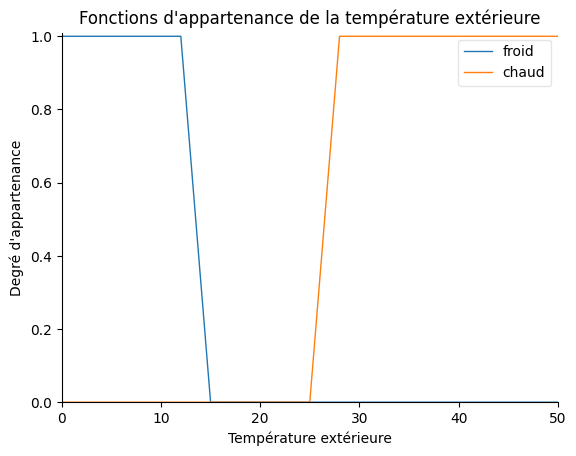

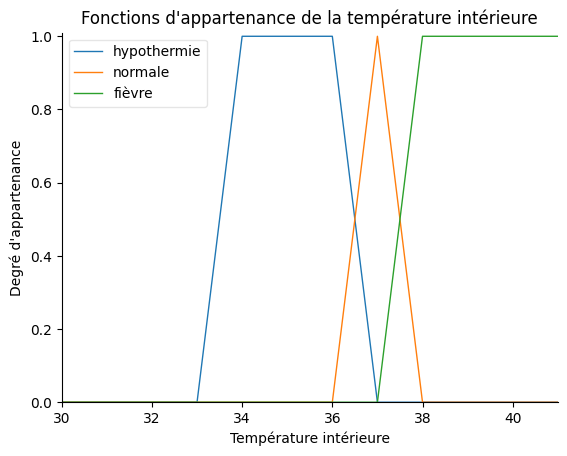

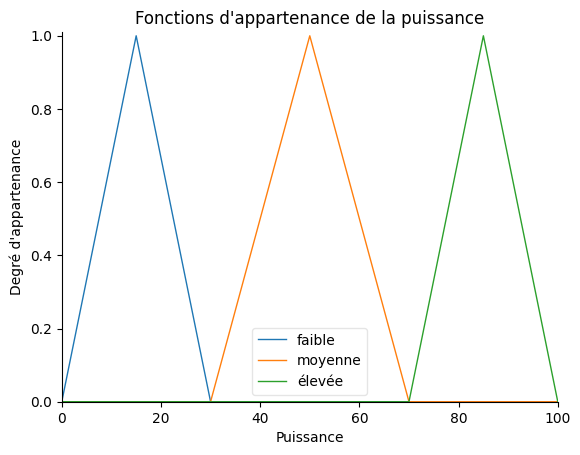

In [10]:
Temp_ext.view( )
plt.title("Fonctions d'appartenance de la température extérieure")
plt.xlabel("Température extérieure")
plt.ylabel("Degré d'appartenance")

Temp_int.view( )
plt.title("Fonctions d'appartenance de la température intérieure")
plt.xlabel("Température intérieure")
plt.ylabel("Degré d'appartenance")

P.view()
plt.title("Fonctions d'appartenance de la puissance")
plt.xlabel("Puissance")
plt.ylabel("Degré d'appartenance")


In [11]:
rule1 = ctrl. Rule(Temp_int['hypothermie' ] & Temp_ext['froid' ], P['élevée' ])
rule2 = ctrl. Rule(Temp_int['normale' ] & Temp_ext['chaud' ], P['faible' ])
rule3 = ctrl. Rule(Temp_int['fièvre' ] & Temp_ext['chaud' ], P['faible' ])

rules = [rule1, rule2, rule3]
systeme = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(systeme)

In [12]:
temp_ext = float(input("Entrez la temperature externe (0-50C) : ") )
temp_int = float(input("Entrez la temperature interne (30-42°C) : ") )
sim. input ['Temp_ext' ] = temp_ext
sim. input ['Temp_int' ] = temp_int
sim.compute()
print(f"\nPuissance recommandee : {sim.output['P']:.2f} %")

Entrez la temperature externe (0-50C) : 30
Entrez la temperature interne (30-42°C) : 38

Puissance recommandee : 15.00 %


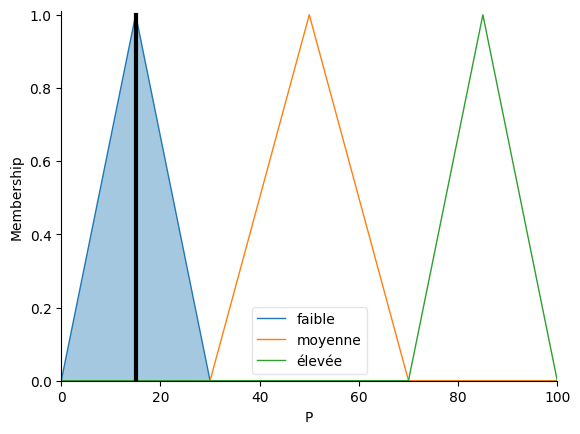

In [13]:
P.view(sim=sim)
plt.show()

Resultats avec differentes methodes de defuzzification :
Centroid : 74.67
Bisector : 75.00
Mean of Maximum (MOM) : 80.00
Smallest of Maximum (SOM) : 60.00
Largest of Maximum (LOM) : 100.00


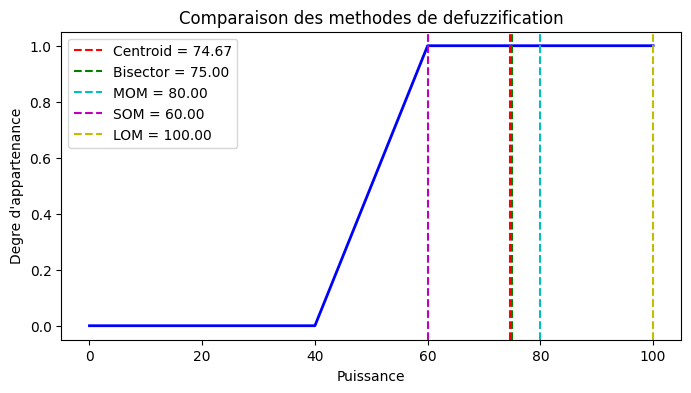

Largest of Maximum (LOM) : 100.00


In [14]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

# Univers de sortie
Puissance = np.arange(0, 101, 1)

# Fonction d'appartenance asymetrique
# Exemple : la puissance est plus activee sur les valeurs elevees
activation = fuzz.trapmf (Puissance, [40, 60, 100, 100])

# Defuzzification avec différentes methodes
val_centroid = fuzz.defuzz(Puissance, activation, 'centroid' )
val_bisector = fuzz.defuzz(Puissance, activation, 'bisector' )
val_mom = fuzz.defuzz(Puissance, activation, 'mom' )
val_som = fuzz.defuzz(Puissance, activation, 'som' )
val_lom = fuzz.defuzz(Puissance, activation, 'lom' )

# Affichage des resultats
print("Resultats avec differentes methodes de defuzzification :")
print(f"Centroid : {val_centroid:.2f}")
print(f"Bisector : {val_bisector:.2f}")
print(f"Mean of Maximum (MOM) : {val_mom:.2f}")
print(f"Smallest of Maximum (SOM) : {val_som:.2f}")
print(f"Largest of Maximum (LOM) : {val_lom:.2f}")

# Affichage graphique
plt.figure(figsize=(8,4))
plt.plot(Puissance, activation, 'b', linewidth=2)
plt.axvline(val_centroid, color='r', linestyle='--', label=f'Centroid = {val_centroid:.2f}' )
plt.axvline(val_bisector, color='g', linestyle='--', label=f'Bisector = {val_bisector:.2f}' )
plt.axvline(val_mom, color='c', linestyle='--', label=f'MOM = {val_mom:.2f}' )
plt.axvline(val_som, color='m', linestyle='--', label=f'SOM = {val_som:.2f}' )
plt.axvline(val_lom, color='y', linestyle='--', label=f'LOM = {val_lom:.2f}' )
plt.title("Comparaison des methodes de defuzzification")
plt.xlabel("Puissance")
plt.ylabel("Degre d'appartenance")
plt.legend ( )
plt.show()

print(f"Largest of Maximum (LOM) : {val_lom:.2f}")

In [15]:
# Température externe
Temp_ext['froid'] = fuzz.trapmf(Temp_exterieure, [0, 0, 15, 20])
Temp_ext['chaud' ] = fuzz.trapmf(Temp_exterieure, [22, 28, 50, 50])

# Température interne
Temp_int[ 'hypothermie'] = fuzz.trapmf(Temp_interieure, [33, 34, 36, 37])
Temp_int['normale'] = fuzz.trapmf (Temp_interieure, [36, 37, 38, 39])
Temp_int['fièvre'] = fuzz.trapmf(Temp_interieure, [38, 39, 41, 42])

# Puissance
P['faible' ] = fuzz.trimf(Puissance, [0, 10, 40])
P['moyenne' ] = fuzz.trimf(Puissance, [35, 50, 80])
P['élevée' ] = fuzz.trimf(Puissance, [70, 90, 100])

Text(0, 0.5, "Degré d'appartenance")

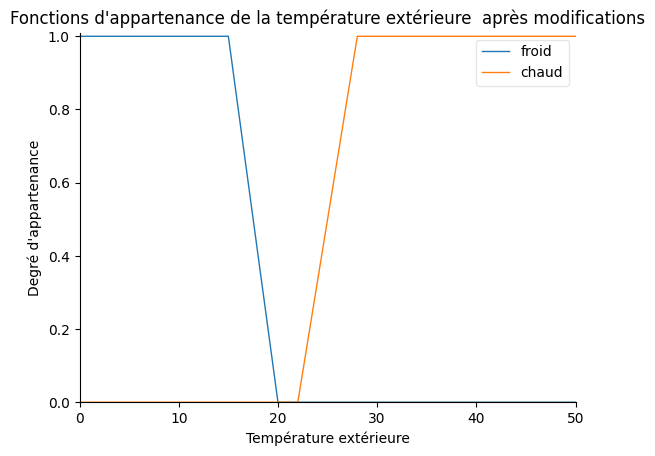

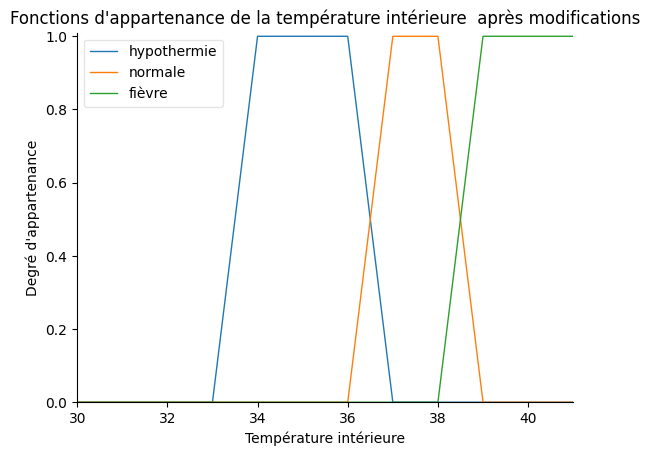

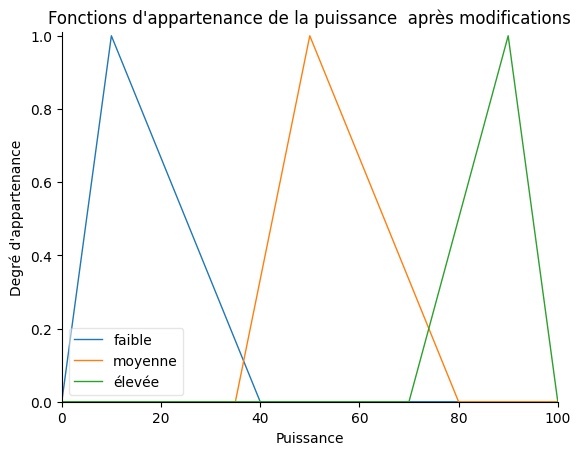

In [16]:
Temp_ext.view( )
plt.title("Fonctions d'appartenance de la température extérieure  après modifications")
plt.xlabel("Température extérieure")
plt.ylabel("Degré d'appartenance")

Temp_int.view( )
plt.title("Fonctions d'appartenance de la température intérieure  après modifications")
plt.xlabel("Température intérieure")
plt.ylabel("Degré d'appartenance")

P.view()
plt.title("Fonctions d'appartenance de la puissance  après modifications")
plt.xlabel("Puissance")
plt.ylabel("Degré d'appartenance")

In [18]:
rule1 = ctrl. Rule(Temp_int['hypothermie' ] & Temp_ext['froid' ], P['élevée' ])
rule2 = ctrl. Rule(Temp_int['normale' ] & Temp_ext['chaud' ], P['faible' ])
rule3 = ctrl. Rule(Temp_int['fièvre' ] & Temp_ext['chaud' ], P['faible' ])

rules = [rule1, rule2, rule3]
systeme = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(systeme)

In [19]:
temp_ext = float(input("Entrez la temperature externe (0-50C) : ") )
temp_int = float(input("Entrez la temperature interne (30-42°C) : ") )
sim. input ['Temp_ext' ] = temp_ext
sim. input ['Temp_int' ] = temp_int
sim.compute()
print(f"\nPuissance recommandee : {sim.output['P']:.2f} %")

Entrez la temperature externe (0-50C) : 28
Entrez la temperature interne (30-42°C) : 37

Puissance recommandee : 16.67 %


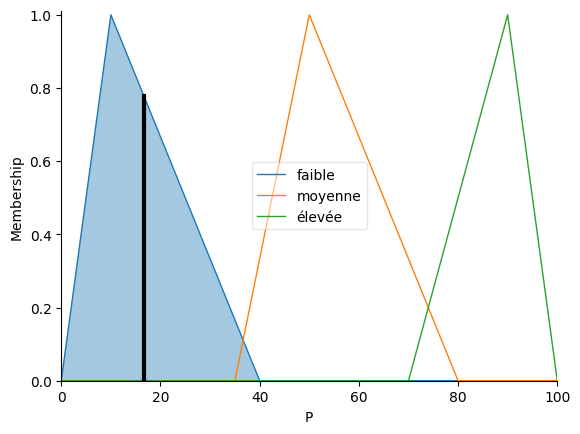

In [20]:
P.view(sim=sim)
plt.show()

In [26]:
import skfuzzy as fuzz
import numpy as np
import skfuzzy.control as ctrl
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Definition des univers et variables
Temp_exterieure = np.arange(0, 51, 1)
Temp_interieure = np.arange(30, 42, 1)
Puissance = np.arange(0, 101, 1)

Temp_ext = ctrl.Antecedent (Temp_exterieure, 'Temp_ext' )
Temp_int = ctrl.Antecedent (Temp_interieure, 'Temp_int' )
P = ctrl.Consequent(Puissance, 'P')

# Fonctions d'appartenance
Temp_ext[ 'froid' ] = fuzz.trapmf (Temp_exterieure, [0, 0, 12,15])
Temp_ext[ 'chaud' ] = fuzz.trapmf (Temp_exterieure, [25,28,50, 50])
Temp_int[ 'hypothermie'] = fuzz.trapmf(Temp_interieure, [34, 34, 36, 36.5] )
Temp_int['normale' ] = fuzz.trapmf (Temp_interieure, [36, 36.5, 37.5, 38] )
Temp_int['fièvre' ] = fuzz.trapmf(Temp_interieure, [37.5,38,41,41])
P['faible' ] = fuzz.trimf(Puissance, [0,15,30])
P['moyenne' ] = fuzz.trimf(Puissance, [30, 50, 70])
P['elevee' ] = fuzz.trimf (Puissance, [70,85,100])

# Règles
rule1 = ctrl.Rule(Temp_int['hypothermie' ] & Temp_ext[ 'froid' ], P['elevee' ])
rule2 = ctrl.Rule(Temp_int[ 'normale' ] & Temp_ext[ 'chaud' ], P['faible' ])
rule3 = ctrl.Rule(Temp_int['fièvre' ] & Temp_ext [ 'chaud' ], P[ 'faible' ])
rules = [rule1, rule2, rule3]
systeme = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(systeme)

# --- Widgets --
temp_ext_slider = widgets.FloatSlider(value=20, min=0, max=50, step=0.1, description='Temp. externe: ')
temp_int_slider = widgets.FloatSlider(value=36.5, min=30, max=42, step=0.1, description='Temp. interne: ')
method_selector = widgets.Dropdown(
    options=['centroid', 'bisector', 'mom', 'som' , 'lom' ],
    value='centroid',
    description='Défuzzification:')
# Cases à cocher pour activer/desactiver les regles
rule1_check = widgets.Checkbox(value=True, description='Hypothermie & Froid + Elevee' )
rule2_check = widgets.Checkbox(value=True, description='Normale & Chaud + Faible' )
rule3_check = widgets.Checkbox(value=True, description='Fievre & Chaud + Faible')

# Historique des resultats
history_output = widgets.Output ()

# Zone d'affichage principale
output_box = widgets.Output()

# --- Fonction de calcul
def calculer(change=None):
    # Mettre à jour les règles dynamiquement
    active_rules = []
    if rule1_check.value: active_rules.append(rule1)
    if rule2_check.value: active_rules.append(rule2)
    if rule3_check.value: active_rules.append(rule3)
    if not active_rules:
        with output_box:
            output_box.clear_output()
            print(" Aucune regle active. Veuillez activer au moins une regle.")
        return

    systeme_active = ctrl.ControlSystem(active_rules)
    sim_active = ctrl.ControlSystemSimulation(systeme_active)

    # Entrées
    sim_active.input['Temp_ext' ] = temp_ext_slider.value
    sim_active.input['Temp_int' ] = temp_int_slider.value
    sim_active.compute()

    # Vérifier si 'P' est dans la sortie avant d'y accéder
    if 'P' in sim_active.output:
        puissance = sim_active.output['P']

        # Affichage
        with output_box:
            output_box.clear_output ()
            print(f"Temp. externe : {temp_ext_slider.value:.1f} C")
            print(f"Temp. interne : {temp_int_slider.value:.1f} C")
            print(f"Puissance ({method_selector.value}) : {puissance:.2f} %")
            P.view(sim=sim_active)
            plt.show()

        # Ajouter à l'historique
        with history_output:
            print(f"Ext-{temp_ext_slider.value:.1f} | Int-{temp_int_slider.value:.1f} | P-{puissance:.2f}%")
    else:
        with output_box:
            output_box.clear_output()
            print(f"Temp. externe : {temp_ext_slider.value:.1f} C")
            print(f"Temp. interne : {temp_int_slider.value:.1f} C")
            print("Aucune puissance n'a pu être calculée. Aucune règle n'a été suffisamment activée pour produire une sortie.")
        with history_output:
            print(f"Ext-{temp_ext_slider.value:.1f} | Int-{temp_int_slider.value:.1f} | P-Non calculée")

# Lier les widgets
temp_ext_slider.observe(calculer, names='value' )
temp_int_slider.observe(calculer, names='value' )
method_selector.observe(calculer, names='value' )
rule1_check.observe(calculer, names='value' )
rule2_check.observe(calculer, names='value' )
rule3_check.observe(calculer, names='value' )
# --- Création des onglets
accueil_tab = widgets.Output()
entrees_tab = widgets.Output()
graphiques_tab = widgets.Output ()
regles_tab = widgets.Output()
historique_tab = widgets.Output()

with accueil_tab:
    print("Bienvenue dans le regulateur flou interactif de puissance.")
    print("Utilisez les onglets pour naviguer entre les fonctionnalites.")

with entrees_tab:
    display(temp_ext_slider, temp_int_slider, method_selector)

with graphiques_tab:
    display(output_box)

with regles_tab:
    display(rule1_check, rule2_check, rule3_check)

with historique_tab:
    display(history_output)

# Onglets
tab = widgets.Tab(children=[accueil_tab, entrees_tab, graphiques_tab, regles_tab, historique_tab])
tab.set_title(0, 'Accueil')
tab.set_title(1, 'Entrées')
tab.set_title(2, 'Graphiques')
tab.set_title(3, 'Règles')
tab.set_title(4, 'Historique' )

display(tab)

# Calcul initial
calculer()